In [8]:
import geopandas as gpd
import fiona
import boto3
from fiona.io import ZipMemoryFile
import os
os.chdir("/Users/canyonfoot/Documents/python_proj/nwf-process-geodata")
from src.common import *

In [9]:
s3 = get_s3_client()
key = "data/raw/climate_change_indicators/flooding/fema_nfhl/fema_nfhl.zip"
BUCKET_NAME = "dataclinic-nwf"
layer_name = 'a00000015.gdbtable'


In [37]:
import boto3
import fiona
import zipfile
import io
import tempfile

def _read_layer_from_zipped_gdb(s3, s3_bucket, s3_key, layer_name):

    response = s3.get_object(Bucket=s3_bucket, Key=s3_key)
    gdb_zip = io.BytesIO(response['Body'].read())

    with tempfile.TemporaryDirectory() as tmpdirname:
        with zipfile.ZipFile(gdb_zip, 'r') as z:
            z.extractall(tmpdirname)
        
        gdb_folder = [f for f in os.listdir(tmpdirname) if f.endswith('.gdb')][0]
        gdb_path = os.path.join(tmpdirname, gdb_folder) + "/" + layer_name
        gdf = gpd.read_file(gdb_path)
        
        # Fix wonnky geometries
        gdf = gdf[gdf.geometry.notnull()]
        gdf['geometry'] = gdf.geometry.apply(lambda x: x if x.is_valid else x.buffer(0))
        gdf['geometry'] = gdf.geometry.simplify(tolerance=0.0001)
    return gdf

gdf = _read_layer_from_zipped_gdb(s3, BUCKET_NAME, key, layer_name)

<Axes: >

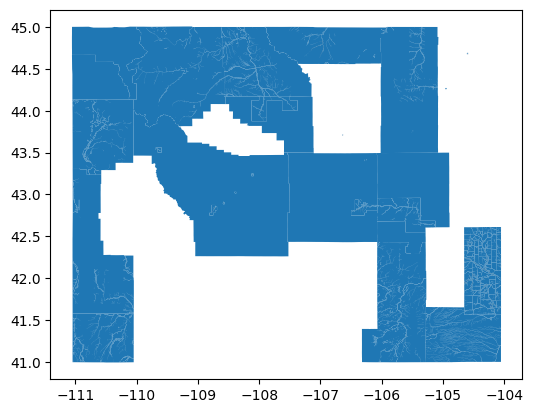

In [39]:
gdf = gpd.read_file("/Users/canyonfoot/Downloads/NFHL_56_20221104 (1)/NFHL_56_20221104.gdb/a00000015.gdbtable")
gdf.plot()

In [38]:
gdf.to_file("test2.geojson", driver="GeoJSON")

In [36]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13947 entries, 0 to 13946
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   DFIRM_ID      13947 non-null  object  
 1   VERSION_ID    13947 non-null  object  
 2   FLD_AR_ID     13947 non-null  object  
 3   STUDY_TYP     13947 non-null  object  
 4   FLD_ZONE      13947 non-null  object  
 5   ZONE_SUBTY    9117 non-null   object  
 6   SFHA_TF       13947 non-null  object  
 7   STATIC_BFE    13947 non-null  float64 
 8   V_DATUM       9937 non-null   object  
 9   DEPTH         13947 non-null  float64 
 10  LEN_UNIT      9940 non-null   object  
 11  VELOCITY      13947 non-null  float64 
 12  VEL_UNIT      10900 non-null  object  
 13  AR_REVERT     9988 non-null   object  
 14  AR_SUBTRV     9218 non-null   object  
 15  BFE_REVERT    13947 non-null  float64 
 16  DEP_REVERT    13947 non-null  float64 
 17  DUAL_ZONE     9218 non-null   object  
 18

In [39]:
gpd.read_file("test2.geojson")

,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,...,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,GFID,SHAPE_Length,SHAPE_Area,geometry
0,56043C,1.1.1.0,56043C_1782,NP,AE,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.000689,6.115813e-10,"POLYGON ((-107.93081 43.99464, -107.93093 43.9..."
1,56043C,1.1.1.0,56043C_2096,NP,AE,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.000095,1.132652e-10,"POLYGON ((-107.94290 44.00353, -107.94292 44.0..."
2,56043C,1.1.1.0,56043C_2197,NP,AE,FLOODWAY,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.024032,3.157082e-06,"POLYGON ((-107.96563 44.01174, -107.96499 44.0..."
3,56043C,1.1.1.0,56043C_2722,NP,A,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.016790,1.333936e-06,"POLYGON ((-107.97745 44.00779, -107.97653 44.0..."
4,56043C,1.1.1.0,56043C_2927,NP,A,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_STUDY1,20130706BAKER2,0.330695,4.137542e-04,"POLYGON ((-108.06275 44.03918, -108.06255 44.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13942,56003C,1.1.1.0,56003C_191,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,0.320618,2.271868e-03,"POLYGON ((-108.51033 44.18461, -108.51039 44.1..."
13943,56003C,1.1.1.0,56003C_192,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,11.767967,1.765007e-01,"POLYGON ((-108.36172 44.52880, -108.36038 44.5..."
13944,56003C,1.1.1.0,56003C_193,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,14.773900,1.917154e-01,"POLYGON ((-108.36775 44.99647, -108.36745 44.9..."
13945,56003C,1.1.1.0,56003C_194,NP,X,AREA WITH REDUCED FLOOD RISK DUE TO LEVEE,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_LOMC1,58752afd-9d5f-48c8-b5c9-eed67941b88b,0.168710,2.862295e-04,"POLYGON ((-108.05877 44.50486, -108.05671 44.5..."


In [19]:
gdf

,DFIRM_ID,VERSION_ID,FLD_AR_ID,STUDY_TYP,FLD_ZONE,ZONE_SUBTY,SFHA_TF,STATIC_BFE,V_DATUM,DEPTH,...,AR_REVERT,AR_SUBTRV,BFE_REVERT,DEP_REVERT,DUAL_ZONE,SOURCE_CIT,GFID,SHAPE_Length,SHAPE_Area,geometry
0,56043C,1.1.1.0,56043C_1782,NP,AE,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.000689,6.115813e-10,"MULTIPOLYGON (((-107.93081 43.99464, -107.9309..."
1,56043C,1.1.1.0,56043C_2096,NP,AE,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.000095,1.132652e-10,"MULTIPOLYGON (((-107.94290 44.00353, -107.9429..."
2,56043C,1.1.1.0,56043C_2197,NP,AE,FLOODWAY,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.024032,3.157082e-06,"MULTIPOLYGON (((-107.96563 44.01174, -107.9655..."
3,56043C,1.1.1.0,56043C_2722,NP,A,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_LOMC1,20130706BAKER2,0.016790,1.333936e-06,"MULTIPOLYGON (((-107.97745 44.00779, -107.9772..."
4,56043C,1.1.1.0,56043C_2927,NP,A,None,T,-9999.0,None,-9999.0,...,None,None,-9999.0,-9999.0,None,56043C_STUDY1,20130706BAKER2,0.330695,4.137542e-04,"MULTIPOLYGON (((-108.06275 44.03918, -108.0626..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13942,56003C,1.1.1.0,56003C_191,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,0.320618,2.271868e-03,"MULTIPOLYGON (((-108.51033 44.18461, -108.5103..."
13943,56003C,1.1.1.0,56003C_192,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,11.767967,1.765007e-01,"MULTIPOLYGON (((-108.36172 44.52880, -108.3615..."
13944,56003C,1.1.1.0,56003C_193,NP,X,AREA OF MINIMAL FLOOD HAZARD,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_STUDY1,58752afd-9d5f-48c8-b5c9-eed67941b88b,14.773900,1.917154e-01,"MULTIPOLYGON (((-108.36775 44.99647, -108.3674..."
13945,56003C,1.1.1.0,56003C_194,NP,X,AREA WITH REDUCED FLOOD RISK DUE TO LEVEE,F,-9999.0,,-9999.0,...,,,-9999.0,-9999.0,,56003C_LOMC1,58752afd-9d5f-48c8-b5c9-eed67941b88b,0.168710,2.862295e-04,"MULTIPOLYGON (((-108.05877 44.50486, -108.0587..."


In [32]:
import numpy as np
np.mean(gdf.geometry.is_valid)

1.0

<Axes: >

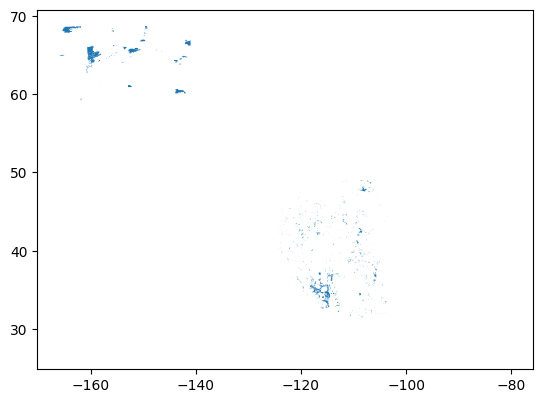

In [36]:
gpd.read_file("/Users/canyonfoot/Downloads/BLM_Natl_ACEC-1.gdb/a00000028.gdbtable").plot()

In [19]:
gpd.read_file("https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/State/Shape/NHD_H_Wyoming_State_Shape.zip")

DriverError: '/vsizip/vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/State/Shape/NHD_H_Wyoming_State_Shape.zip' not recognized as a supported file format.